# A Feed-Foward Neural Network Using Only Numpy

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# The Layer Class

In [2]:
class Layer:
  def __init__(self, shape):
    self.shape = shape
    self.weights = np.random.standard_normal(shape)
    self.biases = np.random.standard_normal((shape[0], 1))
  
  def activation(self, x):
    raise NotImplementedError("Activation function not defined")

  def d_activation(self, x):
    raise NotImplementedError("Derivative of activation not defined")

  def feed_foward(self, x):
    x = np.reshape(x, (self.shape[1], 1))
    self.a = x
    self.z = self.weights@x + self.biases
    return self.activation(self.z)

  def back_prop(self, grad):
    self.delta = grad * self.d_activation(self.z)
    return self.weights.T@self.delta

  def update(self, learning_rate):
    self.weights -= learning_rate * self.delta@self.a.T
    self.biases -= learning_rate * self.delta

# The Sequential Class

In [3]:
class Sequential:
  def __init__(self, layers):
    self.layers = layers
  
  def quad_cost(self, y, a):
    return np.square(y - a) / 2

  def d_quad_cost(self, y, a):
    return a - y

  def predict(self, x):
    for layer in self.layers:
      x = layer.feed_foward(x)
    return x

  def fit(self, X, Y, learning_rate):
    for x, y in zip(X, Y):
      a = self.predict(x)
      grad = self.d_quad_cost(y, a)
      for layer in reversed(self.layers):
        grad = layer.back_prop(grad)
      for layer in self.layers:
        layer.update(learning_rate)

# Making Layers

In [4]:
class Relu(Layer):
  def activation(self, x):
    return np.where(x > 0, x, 0)

  def d_activation(self, x):
    return np.where(x > 0, 1, 0)

class LRelu(Layer):
  def activation(self, x):
    return np.where(x > 0, x, 0.1 * x)

  def d_activation(self, x):
    return np.where(x > 0, 1, 0.1)

class Sigmoid(Layer):
  def activation(self, x):
    return 1 / (1 + np.exp(-x))

  def d_activation(self, x):
    return self.activation(x) * (1 - self.activation(x))

class Sine(Layer):
  def activation(self, x):
    return np.sin(x)

  def d_activation(self, x):
    return np.cos(x)

# Plotting Activations


In [5]:
def contour(x):
  return 1 if np.linalg.norm(x) < 1 else 0

In [6]:
def plot_ground_truth():
  delta = 0.02
  xx, yy = np.mgrid[slice(-2, 2 + delta, delta), slice(-2, 2 + delta, delta)]
  Z = np.reshape([contour(x) for x in zip(xx.flatten(), yy.flatten())], xx.shape)
  cmap = plt.get_cmap('Reds')
  plt.figure(figsize=(4, 4))
  plt.title("Ground Truth", fontsize=18)
  plt.contourf(xx, yy, Z, cmap=cmap)
  plt.show()

In [7]:
def plot_contour(model, plot_title, learning_rate=0.02, batch_size=5000):
  delta = 0.02
  xx, yy = np.mgrid[slice(-2, 2 + delta, delta), slice(-2, 2 + delta, delta)]
  cmap = plt.get_cmap('Reds')

  fig, axs = plt.subplots(3, 3, constrained_layout=True, figsize=(12, 12))
  for i, ax in enumerate(axs.flatten()):
    Z = np.reshape([model.predict(x) for x in zip(xx.flatten(), yy.flatten())], xx.shape)
    X = np.random.standard_normal((batch_size, 2))
    Y = [contour(x) for x in X]
    model.fit(X, Y, learning_rate)
    ax.set_title(f"Epoch {i}")
    ax.contourf(xx, yy, Z, cmap=cmap)
  fig.suptitle(plot_title, fontsize=18)
  plt.show()

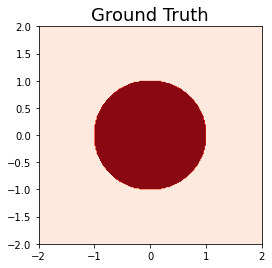

In [8]:
plot_ground_truth()

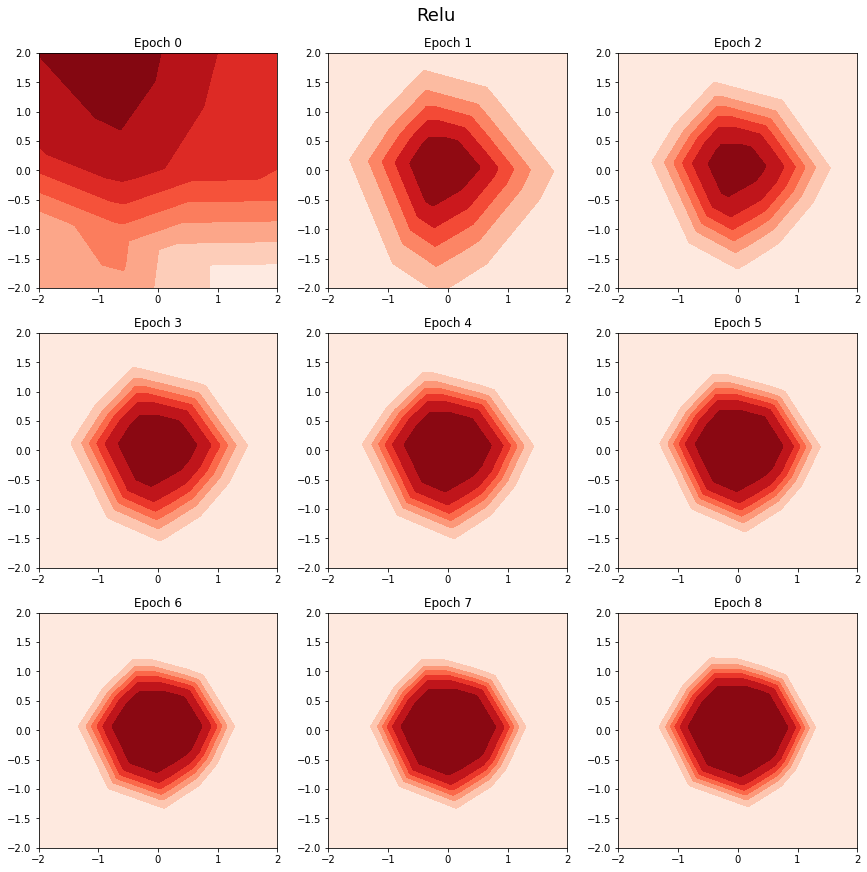

In [9]:
model = Sequential([
  Relu((8, 2)),
  Sigmoid((1, 8))
])

plot_contour(model, "Relu")

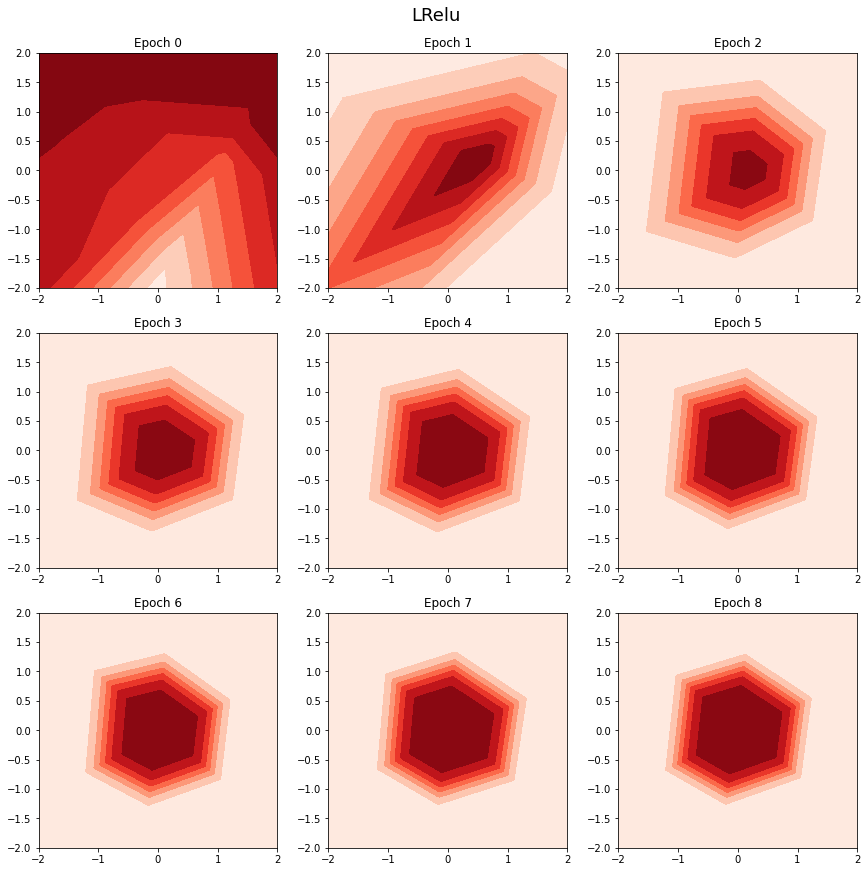

In [10]:
model = Sequential([
  LRelu((8, 2)),
  Sigmoid((1, 8))
])

plot_contour(model, "LRelu")

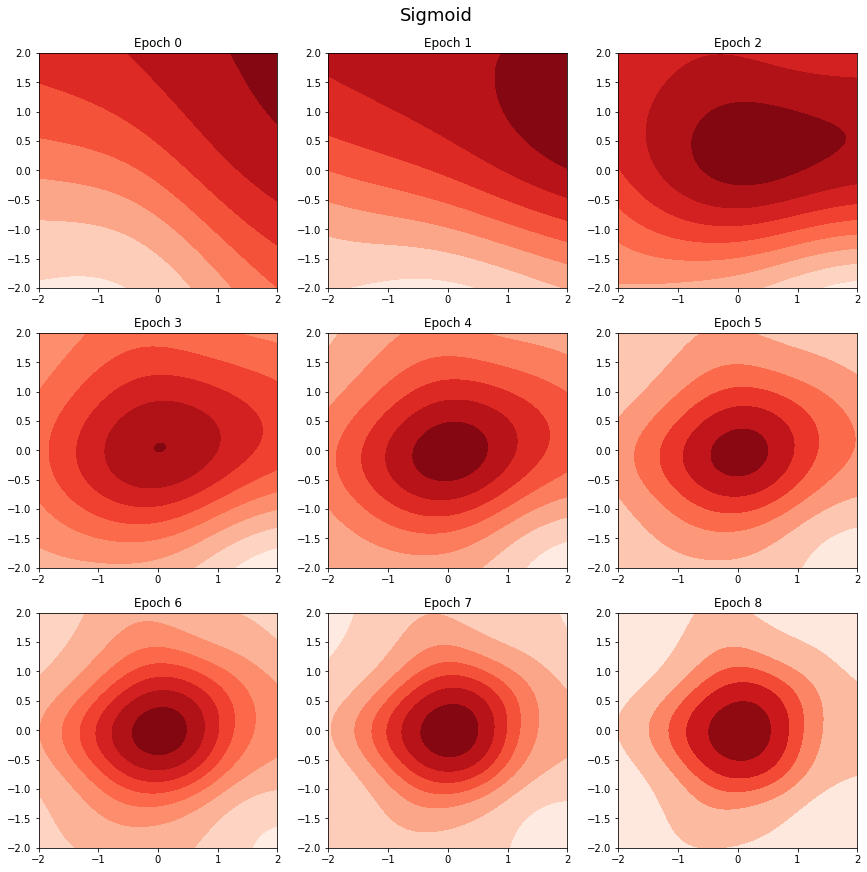

In [11]:
model = Sequential([
  Sigmoid((8, 2)),
  Sigmoid((1, 8))
])

plot_contour(model, "Sigmoid")

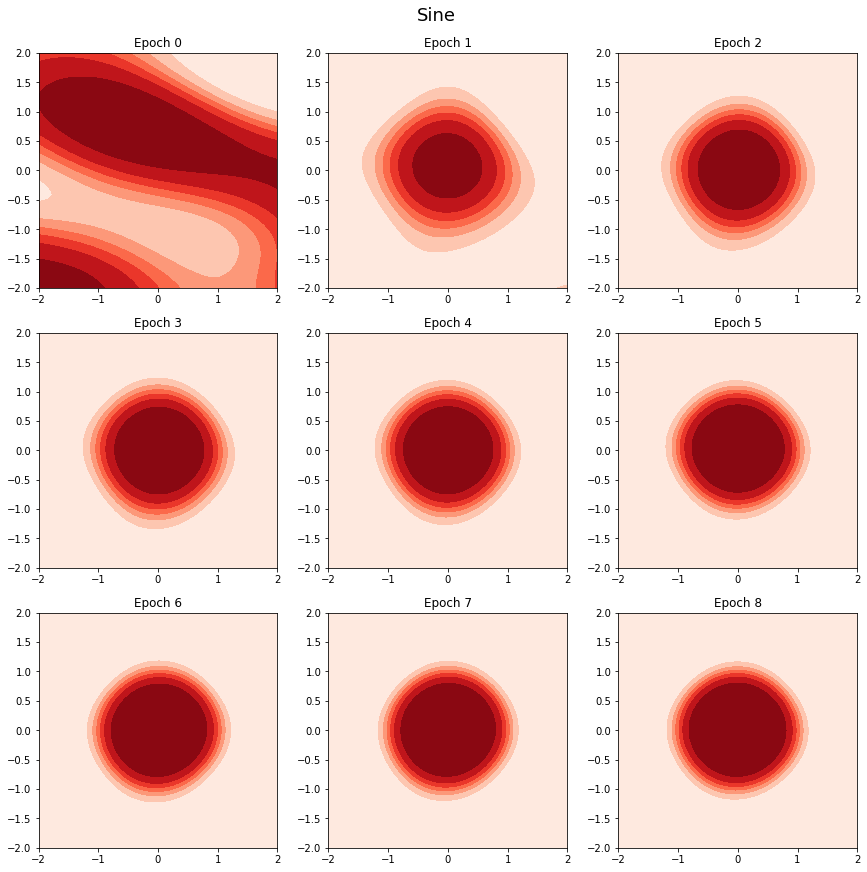

In [12]:
model = Sequential([
  Sine((8, 2)),
  Sigmoid((1, 8))
])

plot_contour(model, "Sine")

# Increasing the Depth

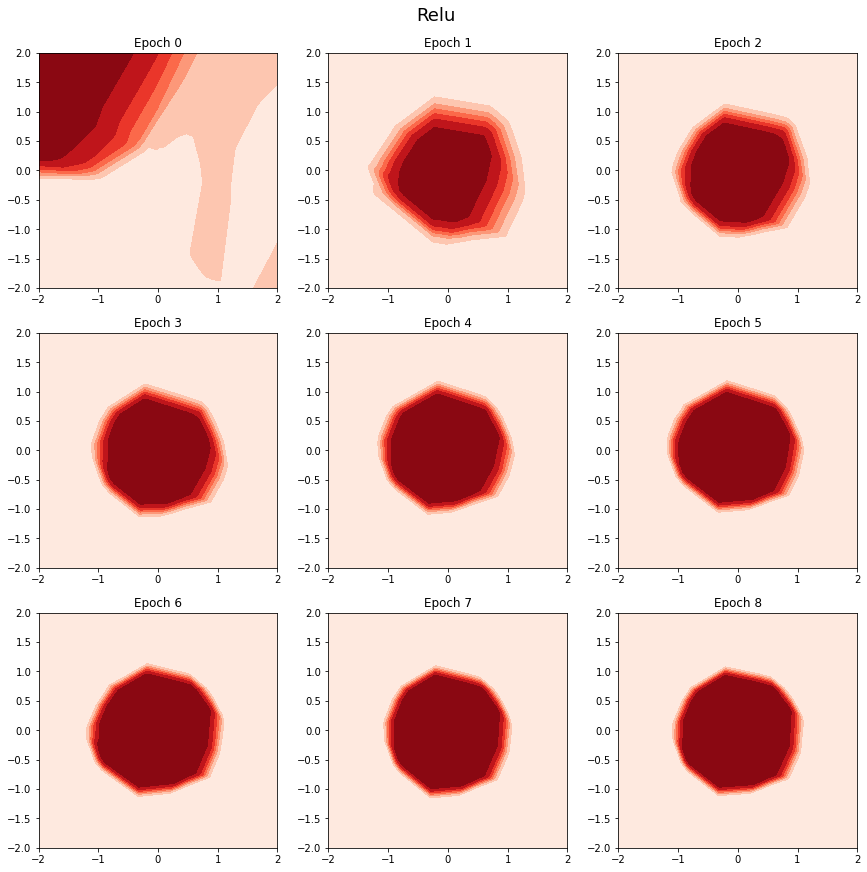

In [13]:
model = Sequential([
  Relu((8, 2)),
  Relu((8, 8)),
  Relu((8, 8)),
  Sigmoid((1, 8))
])

plot_contour(model, "Relu")